This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# xarray ODIM backend

In this example, we read ODIM_H5 (HDF5) data files using the xradar `odim` backend. Throughout the notebook xarray accessors are used to access wradlib functionality.

In [1]:
import glob
import os
import wradlib as wrl
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import xradar as xd
import datatree as xt
import xarray as xr

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

## Load ODIM_H5 Volume Data

In [2]:
fpath = "hdf5/knmi_polar_volume.h5"
f = wrl.util.get_wradlib_data_file(fpath)
vol = xd.io.open_odim_datatree(f)

### Inspect RadarVolume

In [3]:
display(vol)

DataTree('root', parent=None)
│   Dimensions:              ()
│   Data variables:
│       volume_number        int64 0
│       platform_type        <U5 'fixed'
│       instrument_type      <U5 'radar'
│       time_coverage_start  <U20 '2011-06-10T11:40:02Z'
│       time_coverage_end    <U20 '2011-06-10T11:43:54Z'
│       longitude            float32 4.79
│       altitude             float32 50.0
│       latitude             float32 52.95
│   Attributes:
│       Conventions:      ODIM_H5/V2_0
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using xradar
│       instrument_name:  None
├── DataTree('sweep_0')
│       Dimensions:            (azimuth: 360, range: 320)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2011-06-10T11:40:17.361118208...
│         * range              (range) float32 500.0 1.5e+03 ... 3.185e+05 3.195e+05
│           longitude          float32 ...
│           latitude           float32 ...
│           altitude           float32 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float32 ...
├── DataTree('sweep_1')
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2011-06-10T11:40:36.805558272...
│         * range              (range) float32 500.0 1.5e+03 ... 2.385e+05 2.395e+05
│           longitude          float32 ...
│           latitude           float32 ...
│           altitude           float32 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float32 ...
├── DataTree('sweep_2')
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2011-06-10T11:40:56.305557504...
│         * range              (range) float32 500.0 1.5e+03 ... 2.385e+05 2.395e+05
│           longitude          float32 ...
│           latitude           float32 ...
│           altitude           float32 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float32 ...
├── DataTree('sweep_3')
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2011-06-10T11:41:15.805556736...
│         * range              (range) float32 500.0 1.5e+03 ... 2.385e+05 2.395e+05
│           longitude          float32 ...
│           latitude           float32 ...
│           altitude           float32 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode        

### Inspect root group

The `sweep` dimension contains the number of scans in this radar volume. Further the dataset consists of variables (location coordinates, time_coverage) and attributes (Conventions, metadata).

In [4]:
vol.root

DataTree('root', parent=None)
│   Dimensions:              ()
│   Data variables:
│       volume_number        int64 0
│       platform_type        <U5 'fixed'
│       instrument_type      <U5 'radar'
│       time_coverage_start  <U20 '2011-06-10T11:40:02Z'
│       time_coverage_end    <U20 '2011-06-10T11:43:54Z'
│       longitude            float32 4.79
│       altitude             float32 50.0
│       latitude             float32 52.95
│   Attributes:
│       Conventions:      ODIM_H5/V2_0
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using xradar
│       instrument_name:  None
├── DataTree('sweep_0')
│       Dimensions:            (azimuth: 360, range: 320)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2011-06-10T11:40:17.361118208...
│         * range              (range) float32 500.0 1.5e+03 ... 3.185e+05 3.195e+05
│           longitude          float32 ...
│           latitude           float32 ...
│           altitude           float32 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float32 ...
├── DataTree('sweep_1')
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2011-06-10T11:40:36.805558272...
│         * range              (range) float32 500.0 1.5e+03 ... 2.385e+05 2.395e+05
│           longitude          float32 ...
│           latitude           float32 ...
│           altitude           float32 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float32 ...
├── DataTree('sweep_2')
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2011-06-10T11:40:56.305557504...
│         * range              (range) float32 500.0 1.5e+03 ... 2.385e+05 2.395e+05
│           longitude          float32 ...
│           latitude           float32 ...
│           altitude           float32 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float32 ...
├── DataTree('sweep_3')
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2011-06-10T11:41:15.805556736...
│         * range              (range) float32 500.0 1.5e+03 ... 2.385e+05 2.395e+05
│           longitude          float32 ...
│           latitude           float32 ...
│           altitude           float32 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode        

### Inspect sweep group(s)

The sweep-groups can be accessed via their respective keys. The dimensions consist of `range` and `time` with added coordinates `azimuth`, `elevation`, `range` and `time`. There will be variables like radar moments (DBZH etc.) and sweep-dependend metadata (like `fixed_angle`, `sweep_mode` etc.).

In [5]:
display(vol["sweep_0"])

DataTree('sweep_0', parent="root")
    Dimensions:            (azimuth: 360, range: 320)
    Coordinates:
      * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
        elevation          (azimuth) float32 ...
        time               (azimuth) datetime64[ns] 2011-06-10T11:40:17.361118208...
      * range              (range) float32 500.0 1.5e+03 ... 3.185e+05 3.195e+05
        longitude          float32 ...
        latitude           float32 ...
        altitude           float32 ...
    Data variables:
        DBZH               (azimuth, range) float32 ...
        sweep_mode         <U20 ...
        sweep_number       int64 ...
        prt_mode           <U7 ...
        follow_mode        <U7 ...
        sweep_fixed_angle  float32 ...

### Goereferencing

In [6]:
swp = vol["sweep_0"].ds
swp = swp.assign_coords(sweep_mode=swp.sweep_mode)
swp = swp.wrl.georef.georeference()

### Plotting
#### Simple wradlib PPI plot

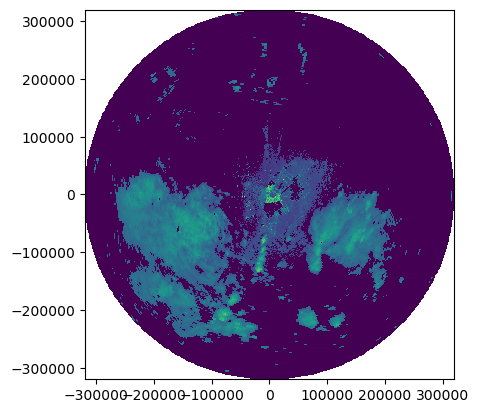

In [7]:
swp.DBZH.wrl.vis.plot()

#### Simple plot on CurveLinear Grid

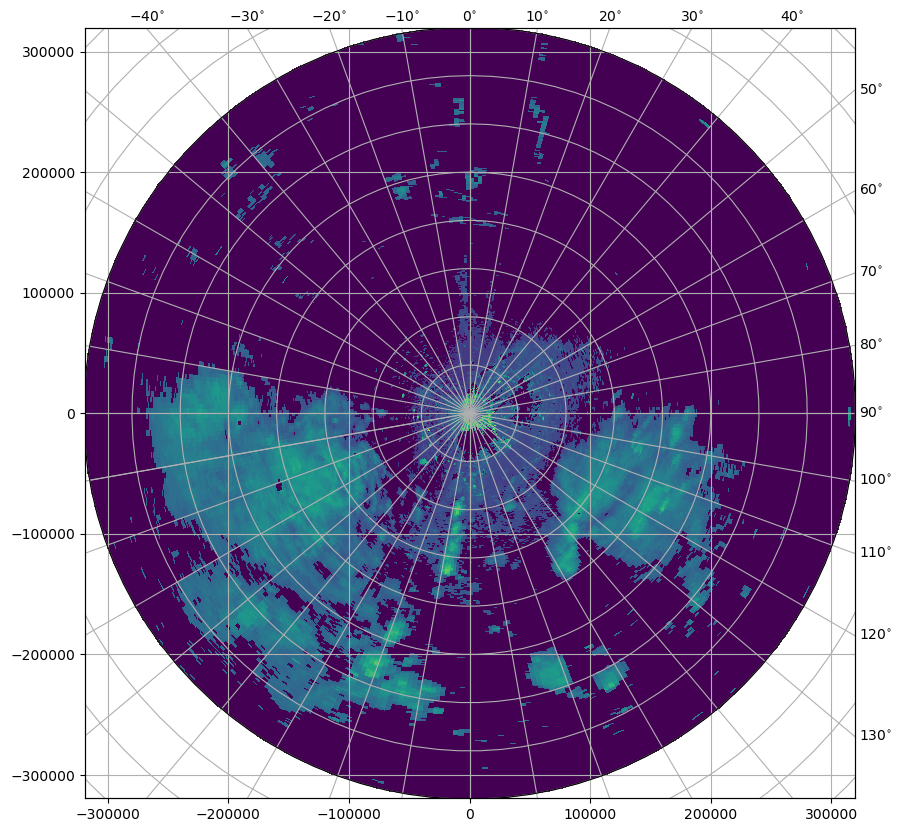

In [8]:
fig = plt.figure(figsize=(10, 10))
swp.DBZH.wrl.vis.plot(crs="cg", fig=fig)

#### Plot on map using cartopy

In [9]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

map_trans = ccrs.AzimuthalEquidistant(
    central_latitude=swp.latitude.values, central_longitude=swp.longitude.values
)

< GeoAxes: +proj=aeqd +ellps=WGS84 +lon_0=4.7899699211120605 +lat_0=52.953338623046875 +x_0=0.0 +y_0=0.0 +no_defs +type=crs >


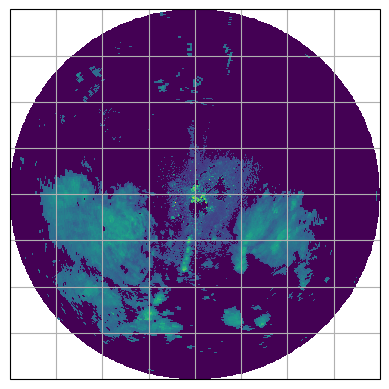

In [10]:
map_proj = ccrs.AzimuthalEquidistant(
    central_latitude=swp.latitude.values, central_longitude=swp.longitude.values
)
pm = swp.DBZH.wrl.vis.plot(crs=map_proj)
ax = plt.gca()
ax.gridlines(crs=map_proj)
print(ax)

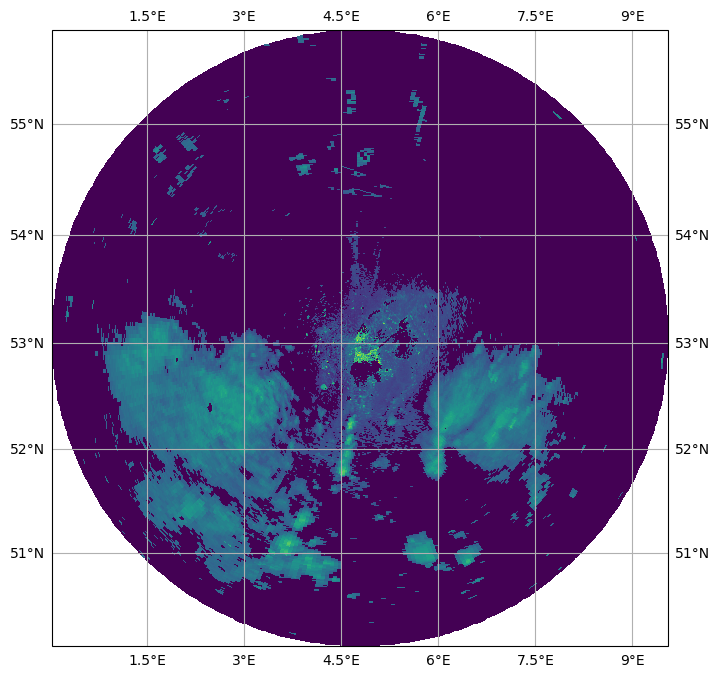

In [11]:
map_proj = ccrs.Mercator(central_longitude=swp.longitude.values)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=map_proj)
pm = swp.DBZH.wrl.vis.plot(ax=ax)
ax.gridlines(draw_labels=True)

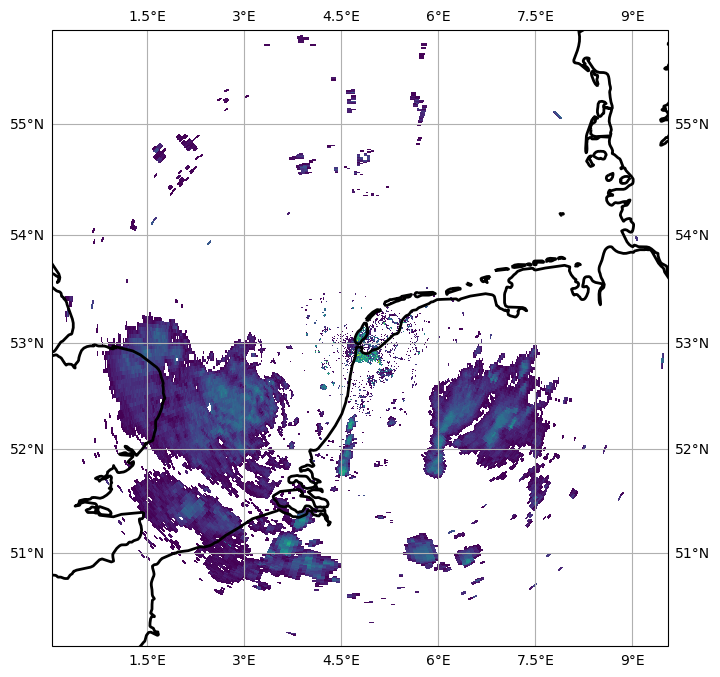

In [12]:
import cartopy.feature as cfeature


def plot_borders(ax):
    borders = cfeature.NaturalEarthFeature(
        category="physical", name="coastline", scale="10m", facecolor="none"
    )
    ax.add_feature(borders, edgecolor="black", lw=2, zorder=4)


map_proj = ccrs.Mercator(central_longitude=swp.longitude.values)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=map_proj)

DBZH = swp.DBZH
pm = DBZH.where(DBZH > 0).wrl.vis.plot(ax=ax)
plot_borders(ax)
ax.gridlines(draw_labels=True)

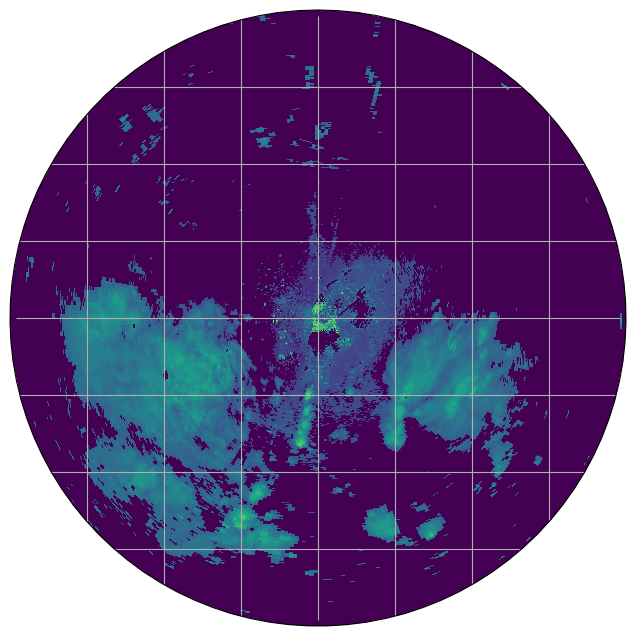

In [13]:
import matplotlib.path as mpath

theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

map_proj = ccrs.AzimuthalEquidistant(
    central_latitude=swp.latitude.values,
    central_longitude=swp.longitude.values,
)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=map_proj)
ax.set_boundary(circle, transform=ax.transAxes)

pm = swp.DBZH.wrl.vis.plot(crs=map_proj, ax=ax)
ax = plt.gca()
ax.gridlines(crs=map_proj)

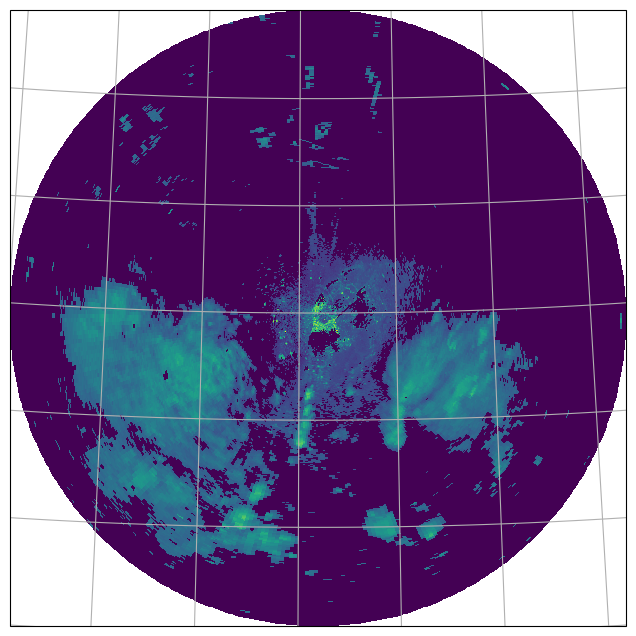

In [14]:
fig = plt.figure(figsize=(10, 8))
crs = ccrs.AzimuthalEquidistant(
    central_latitude=swp.latitude.values, central_longitude=swp.longitude.values
)
ax = fig.add_subplot(111, projection=crs)
pm = swp.DBZH.wrl.vis.plot(ax=ax)
ax.gridlines()

### Inspect radar moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset. There are attributes connected which are defined by ODIM_H5 standard.

In [15]:
display(swp.DBZH)

<xarray.DataArray 'DBZH' (azimuth: 360, range: 320)>
array([[ 22. ,  17. ,  -8. , ..., -31.5, -31.5, -31.5],
       [ 24. ,  24.5,  -9. , ..., -31.5, -31.5, -31.5],
       [ 35.5,  42. ,  12. , ..., -31.5, -31.5, -31.5],
       ...,
       [ 23. ,  14. , -13. , ..., -31.5, -31.5, -31.5],
       [ 23. ,  14. ,  -9. , ..., -31.5, -31.5, -31.5],
       [ 22. ,  18.5, -11.5, ..., -31.5, -31.5, -31.5]], dtype=float32)
Coordinates: (12/15)
  * azimuth      (azimuth) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    elevation    (azimuth) float32 0.3 0.3 0.3 0.3 0.3 ... 0.3 0.3 0.3 0.3 0.3
    time         (azimuth) datetime64[ns] 2011-06-10T11:40:17.361118208 ... 2...
  * range        (range) float32 500.0 1.5e+03 2.5e+03 ... 3.185e+05 3.195e+05
    sweep_mode   <U20 'azimuth_surveillance'
    longitude    float32 4.79
    ...           ...
    y            (azimuth, range) float32 500.0 1.5e+03 ... 3.183e+05 3.193e+05
    z            (azimuth, range) float32 53.0 58.0 64.0 ... 7.691e+03 7.734e+03
    gr           (azimuth, range) float32 500.0 1.5e+03 ... 3.183e+05 3.193e+05
    rays         (azimuth, range) float32 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5
    bins         (azimuth, range) float32 500.0 1.5e+03 ... 3.185e+05 3.195e+05
    spatial_ref  int64 0
Attributes:
    _Undetect:      0.0
    long_name:      Equivalent reflectivity factor H
    standard_name:  radar_equivalent_reflectivity_factor_h
    units:          dBZ

### Create simple plot

Using xarray features a simple plot can be created like this. Note the `sortby('time')` method, which sorts the radials by time.

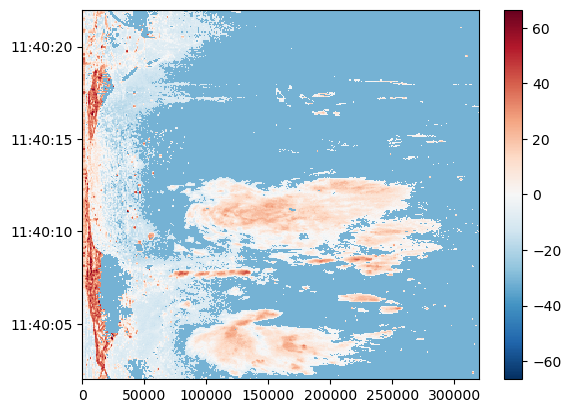

In [16]:
swp.DBZH.sortby("time").plot(x="range", y="time", add_labels=False)

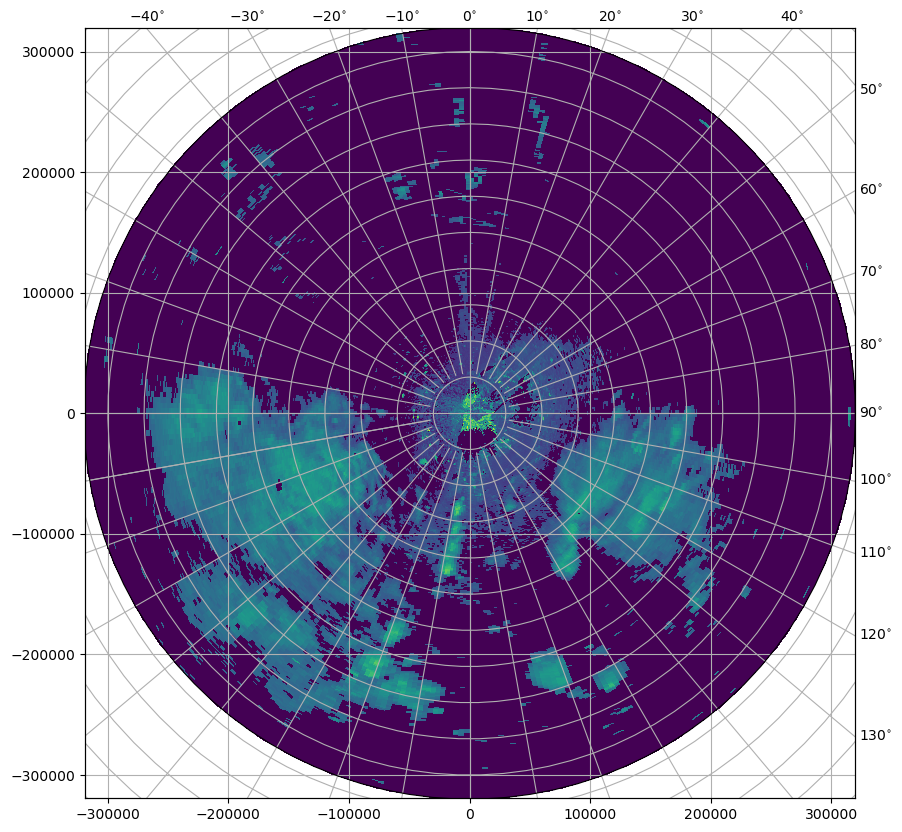

In [17]:
fig = plt.figure(figsize=(10, 10))
pm = swp.DBZH.wrl.vis.plot(crs={"latmin": 33e3}, fig=fig)

### Mask some values

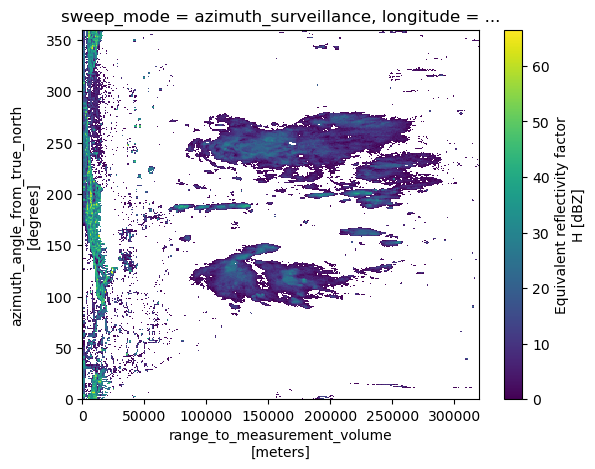

In [18]:
swp["DBZH"] = swp["DBZH"].where(swp["DBZH"] >= 0)
swp["DBZH"].plot()

### Export to ODIM and CfRadial2

In [19]:
xd.io.to_odim(vol.copy(), "knmi_odim.h5", source="RAD:KNMI")

In [20]:
vol["sweep_0"].to_dataset().swap_dims(azimuth="time")

<xarray.Dataset>
Dimensions:            (time: 360, range: 320)
Coordinates:
    azimuth            (time) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
    elevation          (time) float32 ...
  * time               (time) datetime64[ns] 2011-06-10T11:40:17.361118208 .....
  * range              (range) float32 500.0 1.5e+03 ... 3.185e+05 3.195e+05
    longitude          float32 ...
    latitude           float32 ...
    altitude           float32 ...
Data variables:
    DBZH               (time, range) float32 ...
    sweep_mode         <U20 ...
    sweep_number       int64 ...
    prt_mode           <U7 ...
    follow_mode        <U7 ...
    sweep_fixed_angle  float32 ...

In [21]:
xd.io.to_cfradial2(vol.copy(), "knmi_odim_as_cfradial2.nc")

### Import again

In [22]:
vola = xd.io.open_odim_datatree("knmi_odim.h5")
display(vola)

DataTree('root', parent=None)
│   Dimensions:              ()
│   Data variables:
│       volume_number        int64 0
│       platform_type        <U5 'fixed'
│       instrument_type      <U5 'radar'
│       time_coverage_start  <U20 '2011-06-10T11:40:02Z'
│       time_coverage_end    <U20 '2011-06-10T11:43:54Z'
│       longitude            float32 4.79
│       altitude             float32 50.0
│       latitude             float32 52.95
│   Attributes:
│       Conventions:      ODIM_H5/V2_2
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using xradar
│       instrument_name:  None
├── DataTree('sweep_0')
│       Dimensions:            (azimuth: 360, range: 320)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2011-06-10T11:40:17.361118208...
│         * range              (range) float32 500.0 1.5e+03 ... 3.185e+05 3.195e+05
│           longitude          float32 ...
│           latitude           float32 ...
│           altitude           float32 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float32 ...
├── DataTree('sweep_1')
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2011-06-10T11:40:36.805558272...
│         * range              (range) float32 500.0 1.5e+03 ... 2.385e+05 2.395e+05
│           longitude          float32 ...
│           latitude           float32 ...
│           altitude           float32 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float32 ...
├── DataTree('sweep_2')
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2011-06-10T11:40:56.305557504...
│         * range              (range) float32 500.0 1.5e+03 ... 2.385e+05 2.395e+05
│           longitude          float32 ...
│           latitude           float32 ...
│           altitude           float32 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float32 ...
├── DataTree('sweep_3')
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│         * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
│           elevation          (azimuth) float32 ...
│           time               (azimuth) datetime64[ns] 2011-06-10T11:41:15.805556736...
│         * range              (range) float32 500.0 1.5e+03 ... 2.385e+05 2.395e+05
│           longitude          float32 ...
│           latitude           float32 ...
│           altitude           float32 ...
│       Data variables:
│           DBZH               (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode        

In [23]:
volb = xt.open_datatree("knmi_odim_as_cfradial2.nc")
display(volb)

DataTree('None', parent=None)
│   Dimensions:              ()
│   Data variables:
│       volume_number        int64 ...
│       platform_type        object ...
│       instrument_type      object ...
│       time_coverage_start  object ...
│       time_coverage_end    object ...
│       longitude            float32 ...
│       altitude             float32 ...
│       latitude             float32 ...
│   Attributes:
│       Conventions:      Cf/Radial
│       version:          2.0
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None: xradar v0.3.0 CfRadial2 export
│       comment:          im/exported using xradar
│       instrument_name:  None
├── DataTree('sweep_0')
│       Dimensions:            (time: 360, range: 320)
│       Coordinates:
│           azimuth            (time) float32 ...
│           elevation          (time) float32 ...
│         * time               (time) datetime64[ns] 2011-06-10T11:40:02.027777792 .....
│         * range              (range) float32 500.0 1.5e+03 ... 3.185e+05 3.195e+05
│       Data variables:
│           DBZH               (time, range) float32 ...
│           sweep_mode         object ...
│           sweep_number       int64 ...
│           prt_mode           object ...
│           follow_mode        object ...
│           sweep_fixed_angle  float32 ...
├── DataTree('sweep_1')
│       Dimensions:            (time: 360, range: 240)
│       Coordinates:
│           azimuth            (time) float32 ...
│           elevation          (time) float32 ...
│         * time               (time) datetime64[ns] 2011-06-10T11:40:31.027777792 .....
│         * range              (range) float32 500.0 1.5e+03 ... 2.385e+05 2.395e+05
│       Data variables:
│           DBZH               (time, range) float32 ...
│           sweep_mode         object ...
│           sweep_number       int64 ...
│           prt_mode           object ...
│           follow_mode        object ...
│           sweep_fixed_angle  float32 ...
├── DataTree('sweep_2')
│       Dimensions:            (time: 360, range: 240)
│       Coordinates:
│           azimuth            (time) float32 ...
│           elevation          (time) float32 ...
│         * time               (time) datetime64[ns] 2011-06-10T11:40:52.027777792 .....
│         * range              (range) float32 500.0 1.5e+03 ... 2.385e+05 2.395e+05
│       Data variables:
│           DBZH               (time, range) float32 ...
│           sweep_mode         object ...
│           sweep_number       int64 ...
│           prt_mode           object ...
│           follow_mode        object ...
│           sweep_fixed_angle  float32 ...
├── DataTree('sweep_3')
│       Dimensions:            (time: 360, range: 240)
│       Coordinates:
│           azimuth            (time) float32 ...
│           elevation          (time) float32 ...
│         * time               (time) datetime64[ns] 2011-06-10T11:41:13.027777792 .....
│         * range              (range) float32 500.0 1.5e+03 ... 2.385e+05 2.395e+05
│       Data variables:
│           DBZH               (time, range) float32 ...
│           sweep_mode         object ...
│           sweep_number       int64 ...
│           prt_mode           object ...
│           follow_mode        object ...
│           sweep_fixed_angle  float32 ...
├── DataTree('sweep_4')
│       Dimensions:            (time: 360, range: 240)
│       Coordinates:
│           azimuth            (time) float32 ...
│           elevation          (time) float32 ...
│         * time               (time) datetime64[ns] 2011-06-10T11:41:35.027777792 .....
│         * range              (range) float32 500.0 1.5e+03 ... 2.385e+05 2.395e+05
│       Data variables:
│           DBZH               (time, range) float32 ...
│           sweep_mode         object ...
│           sweep_number       int64 ...
│           prt_mode           object ...
│    

## More ODIM loading mechanisms

### Use `xr.open_dataset` to retrieve explicit group

In [24]:
swp_b = xr.open_dataset(
    f, engine="odim", group="sweep_13", backend_kwargs=dict(reindex_angle=False)
)
display(swp_b)

<xarray.Dataset>
Dimensions:            (azimuth: 360, range: 240)
Coordinates:
  * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
    elevation          (azimuth) float32 ...
    time               (azimuth) datetime64[ns] ...
  * range              (range) float32 250.0 750.0 ... 1.192e+05 1.198e+05
    longitude          float32 ...
    latitude           float32 ...
    altitude           float32 ...
Data variables:
    DBZH               (azimuth, range) float32 ...
    sweep_mode         <U20 ...
    sweep_number       int64 ...
    prt_mode           <U7 ...
    follow_mode        <U7 ...
    sweep_fixed_angle  float32 ...

### Use `xr.open_mfdataset` to retrieve timeseries of explicit group 

In [25]:
flist = ["hdf5/71_20181220_060628.pvol.h5", "hdf5/71_20181220_061228.pvol.h5"]
flist = [wrl.util.get_wradlib_data_file(f) for f in flist]
ts = xr.open_mfdataset(
    flist, engine="odim", concat_dim="volume_time", combine="nested", group="sweep_0"
)
display(ts)

<xarray.Dataset>
Dimensions:            (volume_time: 2, azimuth: 360, range: 1200)
Coordinates:
  * azimuth            (azimuth) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
    elevation          (azimuth) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    time               (volume_time, azimuth) datetime64[ns] 2018-12-20T06:06...
  * range              (range) float32 125.0 375.0 625.0 ... 2.996e+05 2.999e+05
    longitude          float64 151.2
    latitude           float64 -33.7
    altitude           float64 195.0
Dimensions without coordinates: volume_time
Data variables: (12/17)
    DBZH               (volume_time, azimuth, range) float32 dask.array<chunksize=(1, 360, 1200), meta=np.ndarray>
    DBZH_CLEAN         (volume_time, azimuth, range) float32 dask.array<chunksize=(1, 360, 1200), meta=np.ndarray>
    VRADDH             (volume_time, azimuth, range) float32 dask.array<chunksize=(1, 360, 1200), meta=np.ndarray>
    VRADH              (volume_time, azimuth, range) float32 dask.array<chunksize=(1, 360, 1200), meta=np.ndarray>
    WRADH              (volume_time, azimuth, range) float32 dask.array<chunksize=(1, 360, 1200), meta=np.ndarray>
    TH                 (volume_time, azimuth, range) float32 dask.array<chunksize=(1, 360, 1200), meta=np.ndarray>
    ...                 ...
    CLASS              (volume_time, azimuth, range) int8 dask.array<chunksize=(1, 360, 1200), meta=np.ndarray>
    sweep_mode         (volume_time) <U20 'azimuth_surveillance' 'azimuth_sur...
    sweep_number       (volume_time) int64 0 0
    prt_mode           (volume_time) <U7 'not_set' 'not_set'
    follow_mode        (volume_time) <U7 'not_set' 'not_set'
    sweep_fixed_angle  (volume_time) float64 0.5 0.5